In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


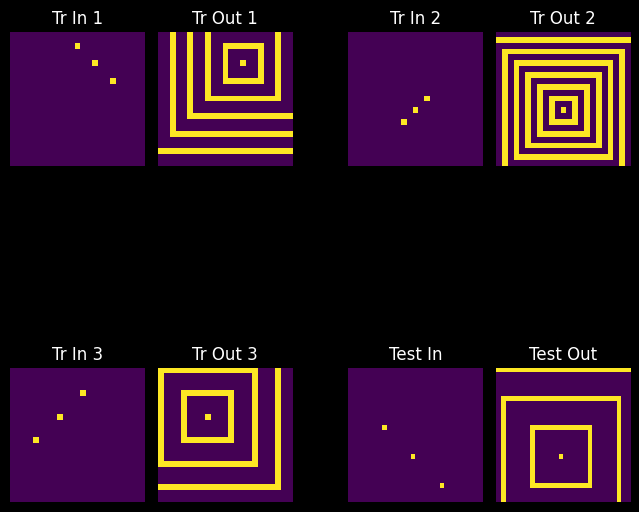

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the 
                    transformation rules and logic of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

In [ ]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt: logic_concept_reasoning_network(f"{prompt}", max_iterations=reasoning_iterations)

set_live_verbosity(0)

n = 10 # 10 
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)


Starting Epoch 1



Training:   0%|          | 0/10 [00:43<?, ?it/s]


TypeError: 'NoneType' object is not callable

In [ ]:
print(train_dtw_scores, test_dtw_scores)